In [1]:
import matplotlib.pyplot as plt
import numpy as np

from netam import pretrained

# DASM Model Demo

This notebook demonstrates how to use the DASM (Deep Antibody Selection Model) pretrained models.

DASM models predict selection factors for paired heavy-light chain antibody sequences.

**Model**: DASMHumV1.0-4M is a 4M parameter transformer-based model trained on human antibody repertoires with paired heavy and light chains. This is the model benchmarked in the DASM paper.

In [2]:
crepe = pretrained.load("DASMHumV1.0-4M")

Loading model DASMHumV1.0-4M
Using cached models: /Users/matsen/re/netam/netam/_pretrained/dasm-1.0.0.zip


We'll use a paired heavy-light chain amino acid sequence from the `data/wyatt-10x-1p5m_paired-merged_fs-all_pcp_2024-11-21_no-naive_sample100_DXSM_Valid.csv.gz` dataset.

These sequences were translated from nucleotide sequences using Biopython.

In [3]:
# Paired heavy-light chain sequences (translated from nucleotide)
heavy_seq = "QVQLVESGGGVVQPGRSLRLSCEASGFTFSSYGMHWVRQAPGKGLEWVAVISYDGSNKYYADSVKGRFSISRDNSKNTLYLQMNSLRAEDTAVYYCAKDRGYYDSSGYYRWYFDYWGQGTLVTVSS"
light_seq = "DIQMTQSPSSLSASVGDRVTITCQASQDISKHLNWYQQKPGKAPKLLIYDASNLETGVPSRFSGSGSGTDFTFTISRLQPEDVATYYCQQYDNLSLTFGGGTKVDIK"

print(f"Heavy chain length: {len(heavy_seq)} amino acids")
print(f"Light chain length: {len(light_seq)} amino acids")
print(f"\nHeavy chain: {heavy_seq}")
print(f"\nLight chain: {light_seq}")

Heavy chain length: 126 amino acids
Light chain length: 107 amino acids

Heavy chain: QVQLVESGGGVVQPGRSLRLSCEASGFTFSSYGMHWVRQAPGKGLEWVAVISYDGSNKYYADSVKGRFSISRDNSKNTLYLQMNSLRAEDTAVYYCAKDRGYYDSSGYYRWYFDYWGQGTLVTVSS

Light chain: DIQMTQSPSSLSASVGDRVTITCQASQDISKHLNWYQQKPGKAPKLLIYDASNLETGVPSRFSGSGSGTDFTFTISRLQPEDVATYYCQQYDNLSLTFGGGTKVDIK


Get selection factors from the DASM model for both chains. The model takes a tuple of (heavy_chain, light_chain) sequences.

In [4]:
aa_input = (heavy_seq, light_seq)

selection_factors_tuple = crepe.model.selection_factors_of_aa_str(aa_input)
heavy_selection_factors = selection_factors_tuple[0]
light_selection_factors = selection_factors_tuple[1]

print(f"Heavy chain selection factors shape: {heavy_selection_factors.shape}")
print(f"Light chain selection factors shape: {light_selection_factors.shape}")

Heavy chain selection factors shape: torch.Size([126, 20])
Light chain selection factors shape: torch.Size([107, 20])


Convert tensors to numpy arrays, take the log (model outputs linear-scale selection factors), and create heatmaps showing selection factors across amino acid positions and residues.

The heatmap shows:
- **x-axis**: Position along the sequence
- **y-axis**: Amino acid type (20 standard amino acids)
- **color**: Log selection factor (blue = diversifying/positive selection, red = purifying/negative selection)

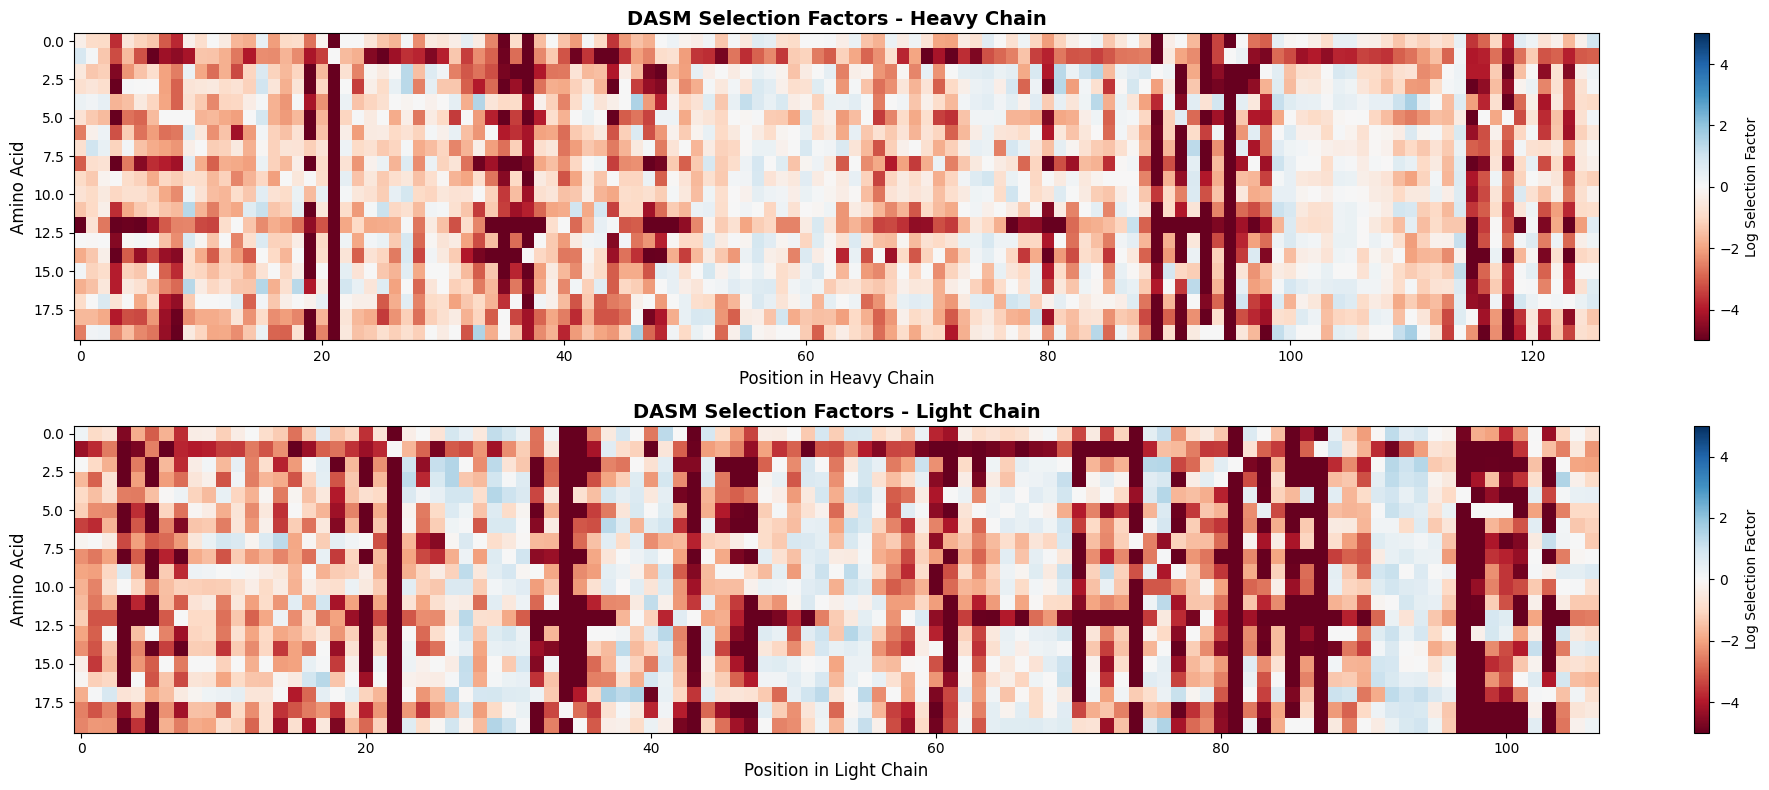

In [7]:
# Convert to numpy arrays and take log (model outputs linear-scale selection factors)
heavy_array = np.log(heavy_selection_factors.detach().numpy())
light_array = np.log(light_selection_factors.detach().numpy())

# Create side-by-side heatmaps
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

# Heavy chain heatmap (blue = diversifying/positive selection, red = purifying/negative selection)
im1 = ax1.imshow(heavy_array.T, aspect='auto', cmap='RdBu', 
                 vmin=-5, vmax=5, interpolation='nearest')
ax1.set_xlabel('Position in Heavy Chain', fontsize=12)
ax1.set_ylabel('Amino Acid', fontsize=12)
ax1.set_title('DASM Selection Factors - Heavy Chain', fontsize=14, fontweight='bold')
plt.colorbar(im1, ax=ax1, label='Log Selection Factor')

# Light chain heatmap (blue = diversifying/positive selection, red = purifying/negative selection)
im2 = ax2.imshow(light_array.T, aspect='auto', cmap='RdBu',
                 vmin=-5, vmax=5, interpolation='nearest')
ax2.set_xlabel('Position in Light Chain', fontsize=12)
ax2.set_ylabel('Amino Acid', fontsize=12)
ax2.set_title('DASM Selection Factors - Light Chain', fontsize=14, fontweight='bold')
plt.colorbar(im2, ax=ax2, label='Log Selection Factor')

plt.tight_layout()
plt.show()

## Selection Factors Interpretation

The selection factors represent the relative selective pressure at each position for each possible amino acid mutation:
- **Higher values (blue)**: Indicate stronger diversifying/positive selection - mutations to this amino acid at this position are more likely to be beneficial
- **Lower values (red)**: Indicate stronger purifying/negative selection - mutations to this amino acid at this position are more likely to be deleterious
- **Values around 0 (white)**: Indicate neutral selection